## **FTK (FOR THE KIDS) - CMPINF0010 FINAL PROJECT**


*INTRODUCTION*      
When considering what would qualify a neighborhood as being the best, we decided that it should be based on each neighborhood's funness level. And what group of people are the best at decided whether something is fun or not? Kids.

Using the datasets provided by the WPRDC, we narrowed down the factors for the funnest neighborhood in Pittsburgh to:
* pools
* parks
* playgrounds


*THE METRIC*    
We decided the best way of judging which neighborhood had the best of each would be through the amount of space the specific factor takes up per person who lives there. For example a small populated neighborhood with a 300 square meter park would win over a largely populated one with the same area. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
population = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
populationDict = dict()

for i in range(len(population)):
    item = population.loc[i, 'Neighborhood']
    populationDict[item] = population.loc[i, 'Estimate; Total']
    
print(populationDict)

{'Allegheny Center': 1411.0, 'Allegheny West': 343.0, 'Allentown': 2558.0, 'Arlington': 1852.0, 'Arlington Heights': 272.0, 'Banksville': 3858.0, 'Bedford Dwellings': 1349.0, 'Beechview': 8078.0, 'Beltzhoover': 1702.0, 'Bloomfield': 8669.0, 'Bluff': 6294.0, 'Bon Air': 920.0, 'Brighton Heights': 7421.0, 'Brookline': 13160.0, 'California-Kirkbride': 803.0, 'Carrick': 10122.0, 'Central Business District': 4060.0, 'Central Lawrenceville': 4775.0, 'Central Northside': 2892.0, 'Central Oakland': 5822.0, 'Chartiers City': 560.0, 'Chateau': 3.0, 'Crafton Heights': 3964.0, 'Crawford-Roberts': 2225.0, 'Duquesne Heights': 2522.0, 'East Allegheny': 2095.0, 'East Carnegie': 610.0, 'East Hills': 2859.0, 'East Liberty': 5537.0, 'Elliott': 2491.0, 'Esplen': 309.0, 'Fairywood': 1181.0, 'Fineview': 1270.0, 'Friendship': 1840.0, 'Garfield': 3966.0, 'Glen Hazel': 716.0, 'Greenfield': 7690.0, 'Hays': 405.0, 'Hazelwood': 4257.0, 'Highland Park': 6810.0, 'Homewood North': 3371.0, 'Homewood South': 2276.0, 'H

In [4]:
poolData = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")

poolDict = dict()

In [5]:
for i in range(len(poolData)):

    item = poolData.loc[i, 'neighborhood']
    
    if item in poolDict:
        poolDict[item] += 1 
    else:
        poolDict[item] = 1

In [6]:
poolSeries = pd.Series(poolDict, name = "neighborhood")
poolSeries.sort_values(ascending = False)[:5]

South Side Flats     2
Highland Park        2
Bedford Dwellings    1
South Side Slopes    1
Westwood             1
Name: neighborhood, dtype: int64

Text(0, 0.5, '# of Pools')

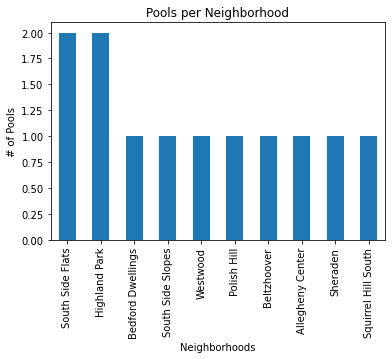

In [7]:
poolSeries.sort_values(ascending=False)[:10].plot.bar()
plt.title('Pools per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('# of Pools')

In [8]:
poolCapacityDict = dict()
for i in range(len(poolData)):

    item = poolData.loc[i, 'neighborhood']
    
    if item in poolCapacityDict:
        poolCapacityDict[item] += poolData.loc[i, 'capacity']
    else:
        poolCapacityDict[item] = poolData.loc[i, 'capacity']

In [12]:
poolCapacitySeries = pd.Series(poolCapacityDict, name = "neighborhood")
poolCapacitySeries.sort_values(ascending = False)[:10]

Bedford Dwellings    538000.0
Brookline            417657.0
Mount Washington     356000.0
Bloomfield           335000.0
South Side Flats     312800.0
Sheraden             278000.0
Allegheny Center     271000.0
Carrick              224100.0
Polish Hill          215451.0
Brighton Heights     205800.0
Name: neighborhood, dtype: float64

In [13]:
poolCapacitySeries.mean()

250261.35294117648

In [ ]:
poolCapacitySeries.sort_values(ascending=False)[:10].plot.bar()
plt.title('Pool Capacity per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Capacity (Gallons)')

In [10]:
final_dict = dict()

# iterate through the dataframe
for i in range(len(poolData)):
    # get the item name and quantity
    item = poolData.loc[i, 'neighborhood']
    
    if item in final_dict: # if it's in the dict
        final_dict[item] += 1 # add the quantity to it
    else:
        final_dict[item] = 1 # otherwise, set it to the quantity

# iterate through the dataframe
for i in range(len(population)):
    # get the item name and quantity
    item = population.loc[i, 'Neighborhood']
    
    if item in final_dict: # if it's in the dict
        final_dict[item] += 1 # add the quantity to it
    else:
        final_dict[item] = 1 # otherwise, set it to the quantity
        
        
print(final_dict)

{'Bedford Dwellings': 2, 'Banksville': 2, 'Beechview': 2, 'Bloomfield': 2, 'Hazelwood': 2, 'Troy Hill': 2, 'East Hills': 2, 'Highland Park': 3, 'Homewood South': 2, 'Brighton Heights': 2, 'Greenfield': 2, 'Lincoln Place': 2, 'Shadyside': 2, 'Brookline': 2, 'South Side Flats': 3, 'Carrick': 2, 'Mount Washington': 2, 'Perry North': 2, 'Squirrel Hill South': 2, 'Sheraden': 2, 'Allegheny Center': 2, 'Beltzhoover': 2, 'Polish Hill': 2, 'Westwood': 2, 'South Side Slopes': 2, 'Lincoln-Lemington-Belmar': 2, 'Allegheny West': 1, 'Allentown': 1, 'Arlington': 1, 'Arlington Heights': 1, 'Bluff': 1, 'Bon Air': 1, 'California-Kirkbride': 1, 'Central Business District': 1, 'Central Lawrenceville': 1, 'Central Northside': 1, 'Central Oakland': 1, 'Chartiers City': 1, 'Chateau': 1, 'Crafton Heights': 1, 'Crawford-Roberts': 1, 'Duquesne Heights': 1, 'East Allegheny': 1, 'East Carnegie': 1, 'East Liberty': 1, 'Elliott': 1, 'Esplen': 1, 'Fairywood': 1, 'Fineview': 1, 'Friendship': 1, 'Garfield': 1, 'Glen 